Importing appropriate libraries. Setting up seaborn for pretty tables

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Importing data for analysis from csv

In [6]:
data = pd.read_csv('data.csv', header=0)
#data = data.dropna() #all rows have empty cells
print(data.shape) 
print(list(data.columns))
data.head()

(199984, 22)
['index', 'actual_turnout', 'deceased', 'discretionary_income', 'dob', 'first_time_seen', 'gender', 'home_type', 'household_income', 'lat', 'lon', 'marital_status', 'mover_status', 'permanent_absentee', 'precinct_id', 'race_ethnicity', 'reg_party', 'registration_date', 'vote_history1', 'vote_history2', 'vote_history3', 'voter_status']


,index,actual_turnout,deceased,discretionary_income,dob,first_time_seen,gender,home_type,household_income,lat,...,mover_status,permanent_absentee,precinct_id,race_ethnicity,reg_party,registration_date,vote_history1,vote_history2,vote_history3,voter_status
0,44861,A,NaN,54.0,19821216,NaN,Male,NaN,288.0,40.682232,...,Resides at Current Address,Y,704.0,B,Democrat,2021-06-04,N,Y,N,Active
1,8751,A,NaN,28.0,19780615,NaN,Male,NaN,85.0,40.600094,...,Resides at Current Address,Y,35.0,B,Democrat,2021-03-24,N,Y,N,Active
2,61124,A,NaN,39.0,19441028,NaN,Female,NaN,145.0,40.674683,...,Resides at Current Address,Y,557.0,B,Republican,2021-06-12,N,Y,Y,Active
3,74017,A,NaN,37.0,19840617,20200929.0,Female,APT,135.0,40.592504,...,Resides at Current Address,Y,236.0,B,Democrat,2020-09-22,N,Y,N,Active
4,71841,A,NaN,NaN,19960523,NaN,Male,NaN,NaN,40.617752,...,Resides at Current Address,Y,298.0,F,Democrat,2020-06-16,N,N,N,Active


In [8]:
a = data['actual_turnout'].unique() #determining values for voter turnout column
print(a)

['A' 'N' 'Y' 'I' 'E']


In [9]:
data_bin = pd.read_csv('data.csv', header=0) #new import for predict var (actual_turnout) binary
print(data_bin.shape) 
print(list(data_bin.columns))
data_bin.head()

(199984, 22)
['index', 'actual_turnout', 'deceased', 'discretionary_income', 'dob', 'first_time_seen', 'gender', 'home_type', 'household_income', 'lat', 'lon', 'marital_status', 'mover_status', 'permanent_absentee', 'precinct_id', 'race_ethnicity', 'reg_party', 'registration_date', 'vote_history1', 'vote_history2', 'vote_history3', 'voter_status']


,index,actual_turnout,deceased,discretionary_income,dob,first_time_seen,gender,home_type,household_income,lat,...,mover_status,permanent_absentee,precinct_id,race_ethnicity,reg_party,registration_date,vote_history1,vote_history2,vote_history3,voter_status
0,44861,A,NaN,54.0,19821216,NaN,Male,NaN,288.0,40.682232,...,Resides at Current Address,Y,704.0,B,Democrat,2021-06-04,N,Y,N,Active
1,8751,A,NaN,28.0,19780615,NaN,Male,NaN,85.0,40.600094,...,Resides at Current Address,Y,35.0,B,Democrat,2021-03-24,N,Y,N,Active
2,61124,A,NaN,39.0,19441028,NaN,Female,NaN,145.0,40.674683,...,Resides at Current Address,Y,557.0,B,Republican,2021-06-12,N,Y,Y,Active
3,74017,A,NaN,37.0,19840617,20200929.0,Female,APT,135.0,40.592504,...,Resides at Current Address,Y,236.0,B,Democrat,2020-09-22,N,Y,N,Active
4,71841,A,NaN,NaN,19960523,NaN,Male,NaN,NaN,40.617752,...,Resides at Current Address,Y,298.0,F,Democrat,2020-06-16,N,N,N,Active


In [14]:
data_bin['actual_turnout']=np.where(data_bin['actual_turnout'] =='A', '1', data_bin['actual_turnout'])
data_bin['actual_turnout']=np.where(data_bin['actual_turnout'] =='N', '0', data_bin['actual_turnout'])
data_bin['actual_turnout']=np.where(data_bin['actual_turnout'] =='Y', '1', data_bin['actual_turnout'])
data_bin['actual_turnout']=np.where(data_bin['actual_turnout'] =='I', '0', data_bin['actual_turnout'])
data_bin['actual_turnout']=np.where(data_bin['actual_turnout'] =='E', '0', data_bin['actual_turnout'])
b = data_bin['actual_turnout'].unique() #insure that new binary established
print(b)

['1' '0']


In [11]:
data['actual_turnout'].value_counts() #initial exploration

A    155682
N     30868
Y     11935
I       990
E       509
Name: actual_turnout, dtype: int64

In [12]:
data_bin['actual_turnout'].value_counts() #initial exploration

1    167617
0     32367
Name: actual_turnout, dtype: int64

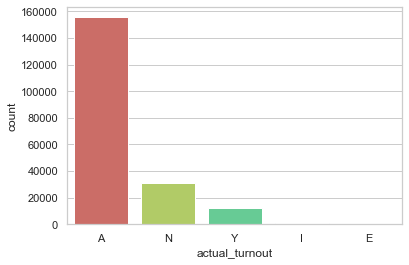

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(x='actual_turnout', data=data, palette='hls') 
plt.show() 
plt.savefig('count_plot')

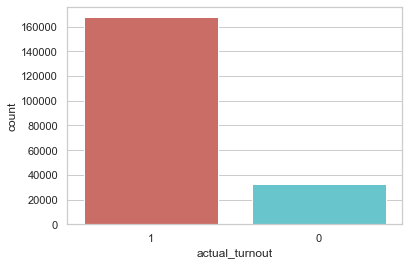

<Figure size 432x288 with 0 Axes>

In [19]:
sns.countplot(x='actual_turnout', data=data_bin, palette='hls') 
plt.show() 
plt.savefig('count_plot2')

In [23]:
count_no_vote = len(data_bin[data_bin['actual_turnout']=='0'])
count_vote = len(data_bin[data_bin['actual_turnout']=='1'])
pct_of_no_vote = count_no_vote/(count_no_vote+count_vote)
print("Nonvoter percentage is", pct_of_no_vote*100)
pct_of_vote = count_vote/(count_no_vote+count_vote)
print("Voter turnout percentage is", pct_of_vote*100)

Nonvoter percentage is 16.18479478358269
Voter turnout percentage is 83.81520521641731


In [24]:
data_bin.groupby('actual_turnout').mean() #basic exploration according to turnout

,index,discretionary_income,dob,first_time_seen,household_income,lat,lon,precinct_id
actual_turnout,,,,,,,,
0,99427.797726,31.817939,1.978423e+07,2.018600e+07,121.304377,40.654593,-73.963486,379.852566
1,100110.216649,39.875556,1.969574e+07,2.018100e+07,156.373166,40.653005,-73.963684,374.483501


First observations by turnout show (significant?) differences in discretionary and household income. Let's break things down by race and party:

In [25]:
data_bin.groupby('race_ethnicity').mean()

,index,discretionary_income,dob,first_time_seen,household_income,lat,lon,precinct_id
race_ethnicity,,,,,,,,
A,100681.028819,19.331384,1.973646e+07,2.018190e+07,65.764051,40.660460,-73.963054,385.914115
B,99944.112309,42.316145,1.968928e+07,2.018076e+07,167.807049,40.652547,-73.963895,372.177672
C,99962.145469,42.942441,1.972292e+07,2.018456e+07,172.480150,40.651809,-73.962839,382.517535
D,99868.566346,23.521012,1.977521e+07,2.018421e+07,77.933121,40.655186,-73.963300,380.393484
E,92684.923077,28.019231,1.971340e+07,2.018244e+07,104.653846,40.648344,-73.965935,370.538462
F,100397.217276,42.254092,1.972708e+07,2.018486e+07,169.728564,40.652553,-73.963872,374.864604


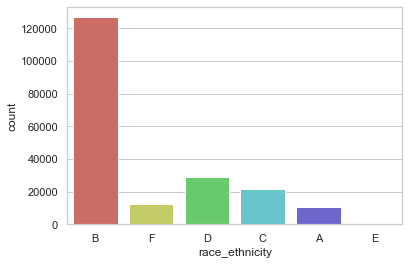

<Figure size 432x288 with 0 Axes>

In [27]:
sns.countplot(x='race_ethnicity', data=data_bin, palette='hls') 
plt.show() 
plt.savefig('race')

In [26]:
data_bin.groupby('reg_party').mean()

,index,discretionary_income,dob,first_time_seen,household_income,lat,lon,precinct_id
reg_party,,,,,,,,
Democrat,100051.629646,36.455436,1.970755e+07,2.018183e+07,139.739837,40.653197,-73.963763,371.606140
Green,99536.001271,33.390424,1.977342e+07,2.018386e+07,124.771639,40.652655,-73.964377,373.810673
Libertarian,98547.069503,43.258635,1.979838e+07,2.018752e+07,168.649799,40.654044,-73.963476,391.203715
No Party,99891.157503,40.711812,1.975110e+07,2.018275e+07,162.643552,40.652817,-73.963445,374.619616
Other,100028.401663,39.515555,1.973585e+07,2.018636e+07,152.562781,40.653756,-73.963812,378.750287
Peace and Freedom,99827.696774,25.187643,1.981761e+07,2.018916e+07,84.423341,40.656207,-73.961914,381.353548
Republican,100040.056156,43.321917,1.965314e+07,2.018004e+07,173.725023,40.653826,-73.963589,385.318612
Unaffiliated,100845.669251,35.619369,1.978938e+07,2.019191e+07,141.731982,40.652852,-73.963459,383.452196


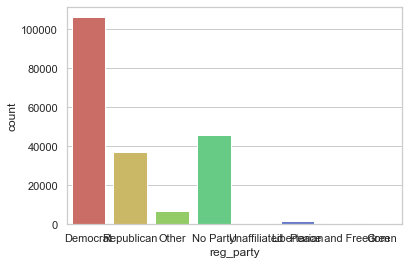

<Figure size 432x288 with 0 Axes>

In [28]:
sns.countplot(x='reg_party', data=data_bin, palette='hls') 
plt.show() 
plt.savefig('party')

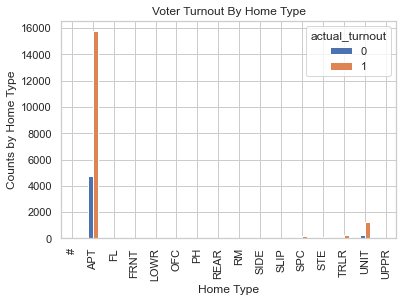

In [29]:
pd.crosstab(data_bin.home_type,data_bin.actual_turnout).plot(kind='bar')
plt.title('Voter Turnout By Home Type')
plt.xlabel('Home Type')
plt.ylabel('Counts by Home Type')
plt.savefig('vote_home')

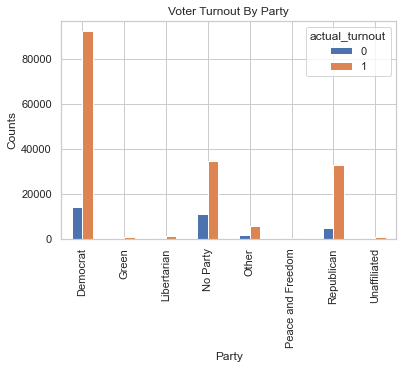

In [30]:
pd.crosstab(data_bin.reg_party,data_bin.actual_turnout).plot(kind='bar')
plt.title('Voter Turnout By Party')
plt.xlabel('Party')
plt.ylabel('Counts')
plt.savefig('party_vote')

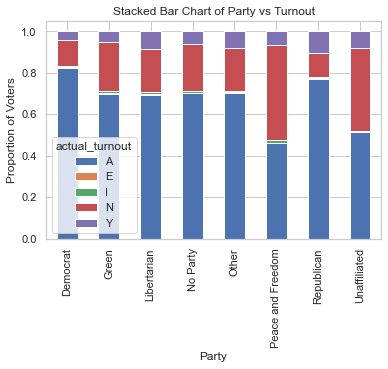

In [31]:
table=pd.crosstab(data.reg_party,data.actual_turnout)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Party vs Turnout')
plt.xlabel('Party')
plt.ylabel('Proportion of Voters')
plt.savefig('party_vote')

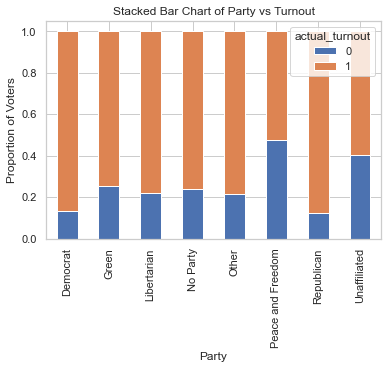

In [32]:
table=pd.crosstab(data_bin.reg_party,data_bin.actual_turnout)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Party vs Turnout')
plt.xlabel('Party')
plt.ylabel('Proportion of Voters')
plt.savefig('party_vote_bin')

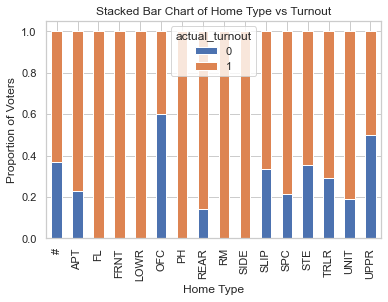

In [33]:
table=pd.crosstab(data_bin.home_type,data_bin.actual_turnout)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Home Type vs Turnout')
plt.xlabel('Home Type')
plt.ylabel('Proportion of Voters')
plt.savefig('home_vote_bin')

OK so now I'm seeing considerable variation in home type, which makes me also want to break down by income as well.

In [34]:
b = data_bin['household_income'].unique() #how is household income broken down?
print(b)

[2.880e+02 8.500e+01 1.450e+02 1.350e+02       nan 3.500e+02 1.050e+02
 6.500e+01 2.140e+02 5.500e+01 7.500e+01 6.750e+02 4.500e+02 4.500e+01
 1.420e+02 1.410e+02 2.810e+02 3.500e+01 6.800e+01 2.500e+01 1.880e+02
 1.520e+02 9.500e+01 1.500e+01 1.000e+01 1.150e+02 7.700e+01 3.450e+02
 1.240e+02 6.200e+01 1.790e+02 2.190e+02 8.750e+02 1.630e+02 1.950e+02
 1.190e+02 1.440e+02 1.270e+02 7.400e+01 8.600e+01 9.100e+01 9.000e+01
 2.310e+02 3.800e+01 6.100e+01 7.310e+02 8.000e+01 7.800e+01 1.130e+02
 5.500e+02 2.380e+02 2.630e+02 4.400e+01 7.000e+01 5.370e+02 7.100e+01
 1.090e+02 4.100e+01 1.030e+02 2.490e+02 6.000e+01 2.500e+02 1.610e+02
 2.060e+02 1.460e+02 2.500e+03 3.100e+01 5.900e+01 3.900e+01 8.300e+01
 1.580e+02 2.250e+02 1.250e+02 1.730e+02 3.020e+02 6.300e+01 1.320e+02
 1.010e+02 1.490e+02 2.890e+02 1.860e+02 2.320e+02 2.150e+02 3.040e+02
 1.620e+02 2.130e+02 6.600e+01 1.260e+02 1.070e+02 3.260e+02 1.430e+02
 2.080e+02 1.900e+01 1.020e+02 1.470e+02 4.300e+01 2.260e+02 1.400e+02
 1.060

In [37]:
#there are way too many options, so let's create ranges for income. let's start with min and max
c = data_bin['household_income'].min(skipna=1)
print(c)
d = data_bin['household_income'].max(skipna=1)
print(d)

1.0
4785.0


In [41]:
data_bin['household_income']=np.where(data_bin[data_bin['household_income'].between(0,1)], '<$1k', data_bin['household_income'])
# emp[emp["Salary"].between(60000, 61000)]
# data_bin['household_income']=np.where(1 < data_bin['household_income'] < 25, '<$25k', data_bin['household_income'])
# data_bin['household_income']=np.where(25 < data_bin['household_income'] < 50, '<$50k', data_bin['household_income'])
# data_bin['household_income']=np.where(50 < data_bin['household_income'] < 75, '<$75k', data_bin['household_income'])
# data_bin['household_income']=np.where(75 < data_bin['household_income'] < 100, '<$100k', data_bin['household_income'])
# data_bin['household_income']=np.where(100 < data_bin['household_income'] < 250, '<$250k', data_bin['household_income'])
# data_bin['household_income']=np.where(250 < data_bin['household_income'] < 500, '<$500k', data_bin['household_income'])
# data_bin['household_income']=np.where(data_bin['household_income'] > 500, '>$500k', data_bin['household_income'])
e = data_bin['household_income'].unique() #hopefully new categories
print(e)

TypeError: '>=' not supported between instances of 'str' and 'int'